In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# from   getdist     import plots, MCSamples 
from   astropy.table import Table

In [2]:
sys.path.append(os.environ['HOME'] + '/DESI/')

In [3]:
from   schechter     import schechter, named_schechter

In [4]:
gama_vmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.19148,0.03903000056743622,0.2469454249819889,-19.514288898304457,6349588.271497136,3052989.601898001
0.14678,0.03903000056743622,0.21070684751247823,-19.59281940013149,4027520.2496576104,1398944.305137531
0.10723,0.03903000056743622,0.2359721751024416,-19.945070914239654,5576424.763272431,541636.7082146929
0.09026,0.03903000056743622,0.21495387626607787,-19.678222349682667,4266038.2003806755,314971.8325214965
0.19381,0.03903000056743622,0.26298999786376953,-20.53782775391534,7594841.842906496,3162129.529927309
0.26095,0.03903000056743622,0.26298999786376953,-20.464857177055965,7594841.842906496,7428791.865532176
0.14096,0.03903000056743622,0.15787673253605988,-18.89293481444552,1735595.1283926105,1240338.4537762108
0.16247,0.03903000056743622,0.26298999786376953,-20.368130796655105,7594841.842906496,1888592.7487608716


In [5]:
gama_lf              = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_lumfn.fits')
gama_lf['S2N_N']     = gama_lf['PHI_N'] / gama_lf['PHI_N_ERROR']
gama_lf['S2N_IVMAX'] = gama_lf['PHI_IVMAX'] / gama_lf['PHI_IVMAX_ERROR']
gama_lf

/tmp/ipykernel_124016/1789927872.py:2: RuntimeWarning: invalid value encountered in true_divide
  gama_lf['S2N_N']     = gama_lf['PHI_N'] / gama_lf['PHI_N_ERROR']
/tmp/ipykernel_124016/1789927872.py:3: RuntimeWarning: invalid value encountered in true_divide
  gama_lf['S2N_IVMAX'] = gama_lf['PHI_IVMAX'] / gama_lf['PHI_IVMAX_ERROR']


MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX,S2N_N,S2N_IVMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan
--,0.0,0.0,0.0,0.0,0.0,--,nan,nan


/tmp/ipykernel_124016/719830864.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
/tmp/ipykernel_124016/719830864.py:6: RuntimeWarning: invalid value encountered in true_divide
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
/tmp/ipykernel_124016/719830864.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')
/tmp/ipykernel_124016/719830864.py:7: RuntimeWarning: invalid value encountered in true_divide
  pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')


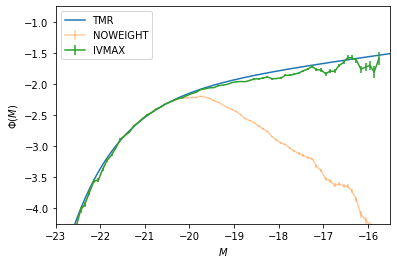

In [6]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR')

pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -.75)
pl.xlim(-23., -15.5)

pl.legend(frameon=True, loc=2)

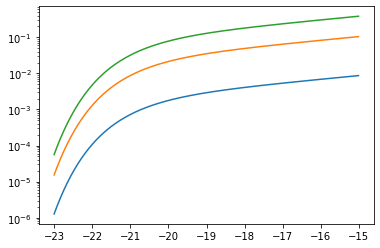

In [7]:
for d8 in [-0.75, 2., 10.]:
    Ms = np.arange(-23., -15., 0.01)
    sc = named_schechter(Ms, named_type='TMR')

    sc *= (1. + d8)
    
    pl.semilogy(Ms, sc)

In [8]:
root = '/global/cscratch1/sd/mjwilson/norberg/GAMA4/cobaya/'

In [9]:
dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

FileNotFoundError: [Errno 2] No such file or directory: '/global/cscratch1/sd/mjwilson/norberg/GAMA4/cobaya/schechter_chain.1.txt'

In [ ]:
samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [ ]:
samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

In [ ]:
tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [10]:
g = plots.get_subplot_plotter()

NameError: name 'plots' is not defined

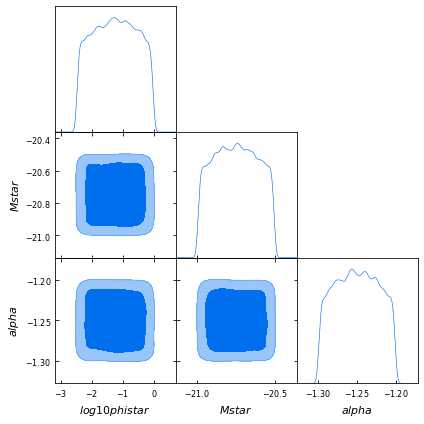

In [13]:
g.triangle_plot([samples], filled=True)        

# Done.